In [3]:
import sys
import os

## ===== Así se importan las funciones de arhcivos en otras direcciones === ###
module_path = os.path.abspath('../.') # Adjust relative path as needed
# Or use an absolute path: module_path = '/home/your_user/projects/utils'

if module_path not in sys.path:
    sys.path.append(module_path)

from functions_MuonsNSAMP1 import * 
from functions_py import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
import skimage as sk
import scipy.ndimage as nd
from array import array
import time

from ROOT import TProfile, TGraphErrors, TH2F, TLegend
# import ROOT

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

# def Gaussian2(x,m1,s1,g1,a1, m2, s2, g2, a2): #data, mean, sigma, gain, height1, heigth2
#     return a1*np.exp(-1/2*((x-m1-g1)/s1)**2) + a2*np.exp(-1/2*((x-m2-g2)/s2)**2)

def Gaussian2(x,m,s,g,a1,a2): #data, mean, sigma, gain, height1, heigth2
    return a1*np.exp(-1/2*((x-m)/s)**2)+a2*np.exp(-1/2*((x-m-g)/s)**2)


def EnergySpectrum(x, N):
    return N * np.sin(x)*np.cos(x)**3

Colormap = 'jet'


# print(time.time())
# print(time.gmtime(0))

In [4]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth": 3,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

Colormap = 'jet'
Norm = mpl.colors.LogNorm(vmin=10**-1, vmax=7 * 10**0)

Filename: ../../images/Pruebas_Mau/Fe55_NSMAP200/proc_skp_m-009_microchip_T_150__Vv82_NSAMP_200_NROW_300_NCOL_700_EXPOSURE_20_NBINROW_1_NBINCOL_1_img_122.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (700, 300)   float32   
  1                1 ImageHDU       164   (700, 300)   float32   
  2                1 ImageHDU       164   (700, 300)   float32   
  3                1 ImageHDU       164   (700, 300)   float32   


None
----------------


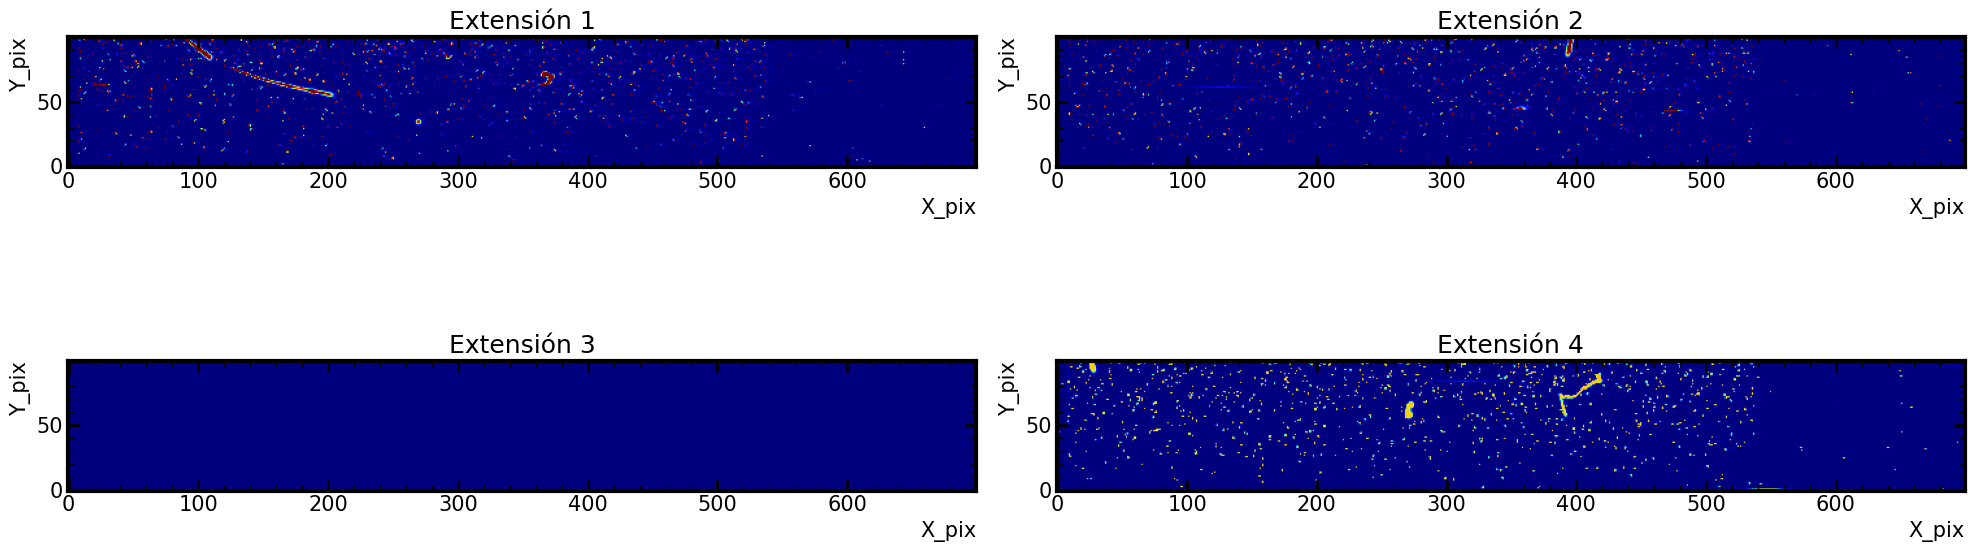

In [15]:
path = '../../images/Pruebas_Mau/Fe55_NSMAP200/proc_skp_m-009_microchip_T_150__Vv82_NSAMP_200_NROW_300_NCOL_700_EXPOSURE_20_NBINROW_1_NBINCOL_1_img_122.fits'



hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    # plt.imshow(hdu_list[i].data[:100, :],vmin = 100, vmax = 100000, cmap = Colormap)
    plt.imshow(hdu_list[i].data[:100, :]-np.median(hdu_list[i].data[:100, :]),vmin = 100, vmax = 100000, cmap = Colormap)
    plt.title('Extensión '+str(i+1))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
    plt.tight_layout()
plt.show()

# Sustrayendo el promedio por renglón

In [16]:
extension = 2

## Sustrayendo la media del renglon

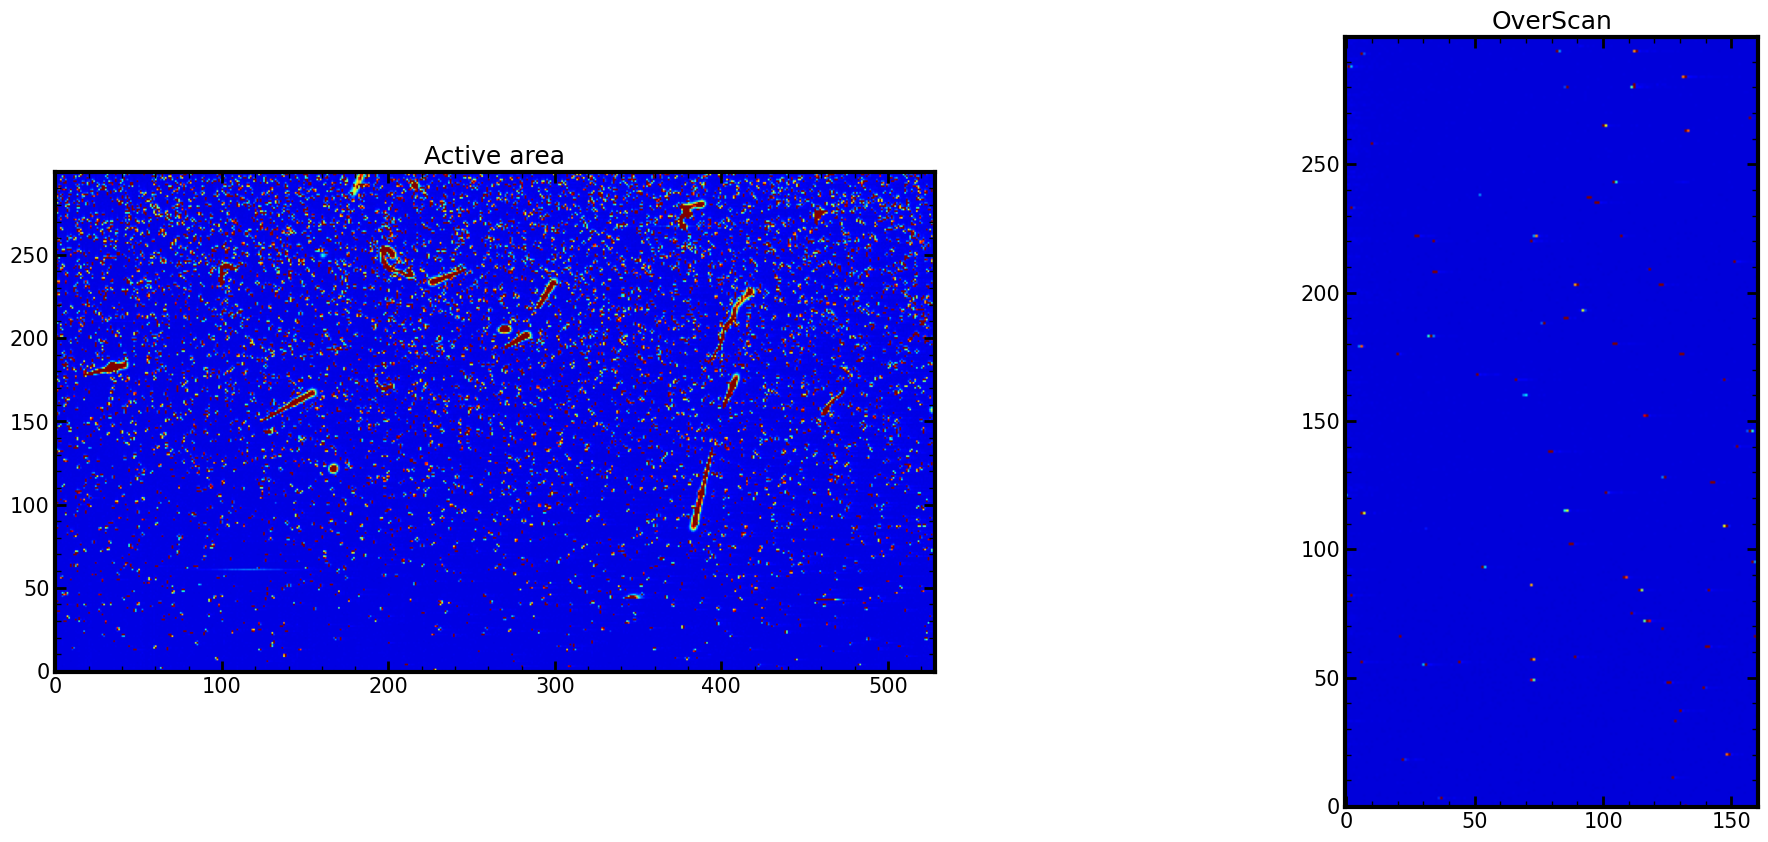

In [17]:
### Muestra el area activa y overscan de la extensión 
# plt.imshow(hdu_list[0].data[:, 550:], vmin = 0, vmax = 80000, origin = 'lower')
# Overscan = hdu_list[extension - 1].data[:300, 539:]
# active_area = hdu_list[extension - 1].data[:300, 10:539]

# Overscan = hdu_list[extension - 1].data[:250, 539:]
# active_area = hdu_list[extension - 1].data[:250, 10:539]

Overscan = hdu_list[extension - 1].data[:, 539:]
active_area = hdu_list[extension - 1].data[:, 10:539]


fig, axs = plt.subplots(1,2, figsize=[25,10])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
axs[0].imshow(active_area, origin='lower', vmin = 100, vmax = 100000, cmap = Colormap)
axs[0].set_title('Active area')

axs[1].imshow(Overscan, origin='lower', vmin = 1000, vmax = 100000, cmap = Colormap)
axs[1].set_title('OverScan')

# plt.colorbar()
plt.show()

# fig, axs = plt.subplots(figsize=[10,10])
# active_area_mask=sk.measure.label(active_area>=np.max(active_area), connectivity=2)
# active_area_true=ma.masked_array(active_area,mask=(active_area_mask>0))
# plt.colorbar(location = 'bottom')
# plt.colorbar()

# fig.colorbar(x1, ax=axs[0])
# fig.colorbar(x2, ax=axs[1])

plt.show()


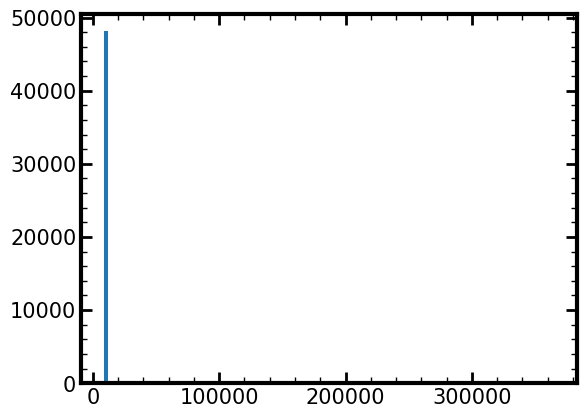

In [18]:
plt.hist(Overscan.flatten(), bins = 100)
# plt.yscale('log')
plt.show()

In [19]:
### Dimensiones de Overscan
print('Dimensiones Oscan: ', Overscan.shape)
oscan_x = Overscan.shape[1]
oscan_y = Overscan.shape[0]


### Dimensiones de Active Area
print('Dimensiones ActA: ', active_area.shape)
acta_x = active_area.shape[1]
acta_y = active_area.shape[0]

Dimensiones Oscan:  (300, 161)
Dimensiones ActA:  (300, 529)


In [20]:
### Se sustrae la mediana de cada renglón y se crea un arreglo
medi_rows_value = []
for element in np.arange(0, oscan_y):
    row = Overscan[element: element +1, 0: oscan_x]
    num_row = element + 1
    # plt.imshow(row, origin='lower')
    # plt.show()
    # print(row.shape)
    # print(type(row))
    # print(row.sum()/row.shape[1])
    medi_value = np.median(row)
    medi_rows_value.append([medi_value])
    # print((num_row, mean_value))

print(medi_rows_value[0])

[np.float32(8807.26)]


In [21]:
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del area activa
true_active_area = active_area - medi_rows_value
print(active_area[1][1])
print(true_active_area[1][1])
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del oScan
# true_Oscan = Overscan - mean_rows_value


true_Oscan = Overscan
min_oScan = np.min(true_Oscan)
# plt.imshow(true_active_area, origin='lower')

8797.92
4.0947266


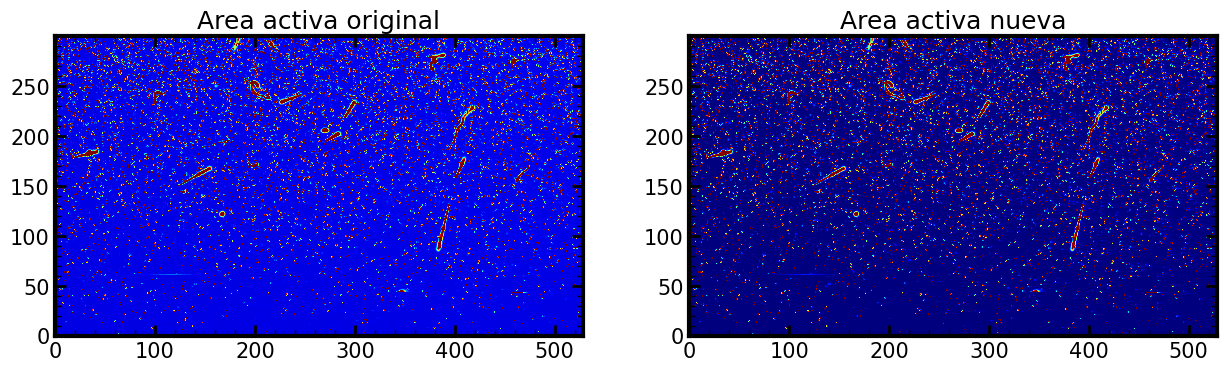

In [22]:
## Se muestra la comparación de la extensión original y despues de quitarle la mediana

Figsize = [15,15]
fig, axs = plt.subplots(1, 2, figsize=Figsize)
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 100000
axs[0].set_title('Area activa original')
axs[1].set_title('Area activa nueva')
x0 = axs[0].imshow(active_area, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
x1 = axs[1].imshow(true_active_area, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

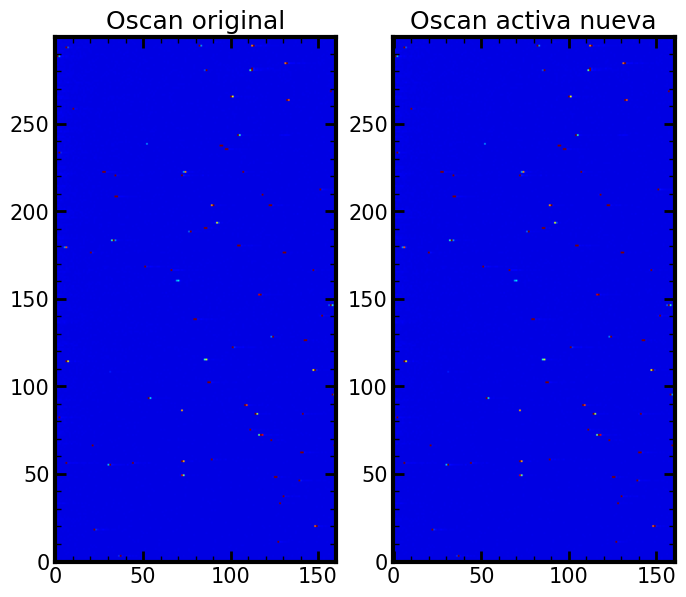

In [23]:
fig, axs = plt.subplots(1, 2, figsize=[8,8])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 100000
axs[0].set_title('Oscan original')
axs[1].set_title('Oscan activa nueva')
x0 = axs[0].imshow(Overscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
x1 = axs[1].imshow(true_Oscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

/tmp/ipykernel_4764/3391049149.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


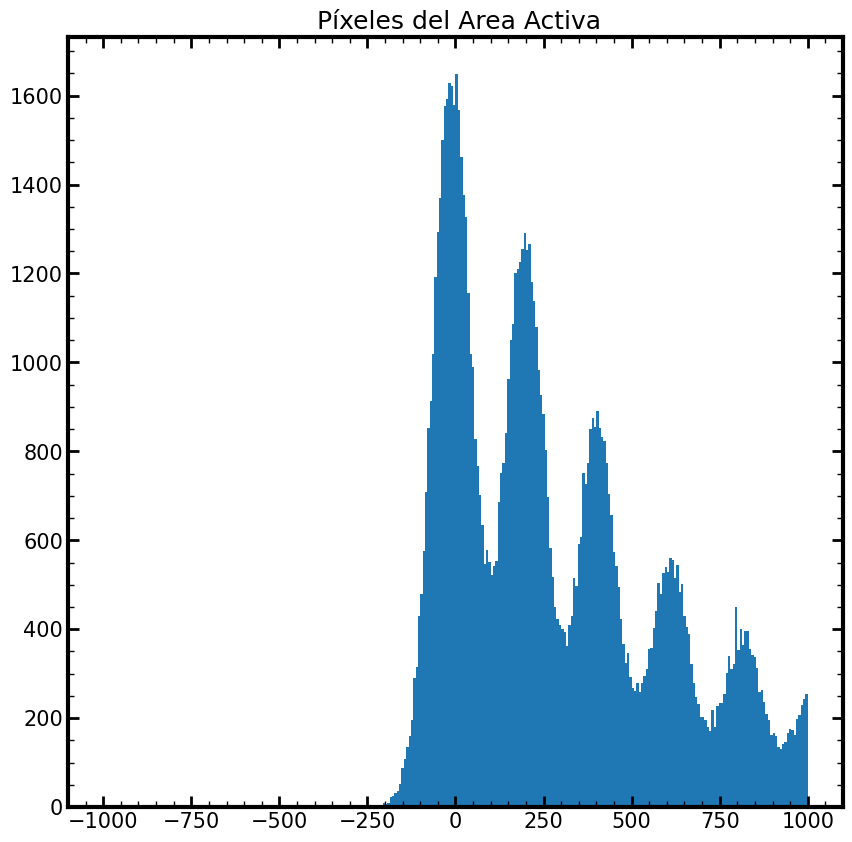

In [24]:
fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))

# print(true_Oscan)
min_oScan = np.min(true_Oscan)

# act = true_active_area - offset
## Generamos el histograma de los pixeles del oScan especificando el rango
axs_all.hist(true_active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(true_Oscan.flatten(), bins= 200, range = (8000, 9500))# , label="Pixeles del Overscan")


# axs_all.vlines(14651.275, ymin=0, ymax=900, colors='k', linestyle = 'dashed', label = 'Offset')
# axs_all.vlines(14720.0, ymin=0, ymax=2000, colors='r')

axs_all.set_title(' Píxeles del Area Activa')
plt.legend()

plt.show()

In [25]:
h2=TH1F("histogram", r"Distribucion del Area Activa", 100, -250, 1200)
# h3.AddDirectory(False)
for pixel_value in true_active_area.flatten():
    # if not np.ma.is_masked(pixel_value):
    h2.Fill(pixel_value)
    #print(pixel_value)

c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h2.SetStats(0)
h2.GetXaxis().SetTitle("Energia (ADUs)")
h2.Draw()
c1.Draw()

## Aplanando el Oscan

### Doble Gaussiana

In [26]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 1000
Bins_fit = Bins
# Range_fit = [-100, 400]

Range_fit = [-50, 350]
ratio_keV = 0.0036  ## KeV/e-

# data = hdu_list[extension-1].data[:, :550]
data = true_active_area
header = hdu_list[extension-1].header
# oScan=hdu_list[extension-1].data[:,550:]

hist , bins_edges = np.histogram(true_Oscan.flatten(), bins = Bins,  range=(min_oScan, 18000))
offset = bins_edges[np.argmax(hist)]
print('Offset Value: ', offset, ' ADUs')
Overscan_plane = true_Oscan - offset 
fgaus2 = TF1("fgaus2","[3]*exp(-0.5*((x-[0])/[1])^2)+[4]*exp(-0.5*((x-[0]-[2])/[1])^2)", Range_fit[0], Range_fit[1],5) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)

h3=TH1F("histogram", r"Distribucion del Overscan",Bins_fit, -200, 400)
# h3.AddDirectory(False)
for pixel_value in Overscan_plane.flatten():
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)

fgaus2.SetParameters(0,40,210, 400, 50) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
# fgaus2.SetParameters(3.999255762274112,62.819921446387646, 197.8901791750652, 106.11699858208667, 4.973093664397046)

h3.Fit(fgaus2, "R")


c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (ADUs)")
h3.Draw()
fgaus2.GetXaxis().SetRangeUser(-100,10000)
fgaus2.Draw("same")
c1.Draw()

leg = TLegend(0.5, 0.7, 0.9, 0.9)
leg.AddEntry(h3, "Datos", "L")
leg.AddEntry(fgaus2, "Ajuste de doble gaussiana", "L")
leg.Draw()

gStyle.SetOptFit(1100)

# # fgaus2.Draw('Quiet')
print('Parameters of the Doble-Gaussian Fit')
print('Mean: ', fgaus2.GetParameters()[0],  ' +- ', fgaus2.GetParError(0))
print('Sigma: ', fgaus2.GetParameters()[1],  ' +- ', fgaus2.GetParError(1))
print('Gain: ', fgaus2.GetParameters()[2],  ' +- ', fgaus2.GetParError(2))
print('First Peak: ', fgaus2.GetParameters()[3],  ' +- ', fgaus2.GetParError(3))
print('Second Peak: ', fgaus2.GetParameters()[4],  ' +- ', fgaus2.GetParError(4), '\n')
print("chiSquare: " + str(fgaus2.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus2.GetNDF()))
# print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus2.GetProb(), '\n')


Offset Value:  8836.348  ADUs
Parameters of the Doble-Gaussian Fit
Mean:  8.172754968607642  +-  0.8069283954286297
Sigma:  68.02990400490283  +-  0.65720041450345
Gain:  212.05913117338986  +-  2.0341729525078915
First Peak:  148.16117512401328  +-  0.9996839242865319
Second Peak:  14.726046444355042  +-  0.3873206636153064 

chiSquare: 632.7117822161031
NDegrees of Freedom: 661
Prob: 0.7796464137931306 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      632.712
NDf                       =          661
Edm                       =   7.7881e-07
NCalls                    =          198
p0                        =      8.17275   +/-   0.806928    
p1                        =      68.0299   +/-   0.6572      
p2                        =      212.059   +/-   2.03417     
p3                        =      148.161   +/-   0.999684    
p4                        =       14.726   +/-   0.387321    


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [27]:
delta_Bin = 0
dict_popt =  oScan_fit_NSAMP324_ROOT(extensión = extension, active_area = data, oScan = true_Oscan, Bins = Bins, Bins_fit=Bins_fit,
                                        make_figure_flag = False, range_fit=[-50, 350])


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [28]:
##### Sigma en e- ####
sig_ADUs = dict_popt['sigma']
Gain = dict_popt['Gain']
offset = dict_popt['Offset']

sig_elec = abs(( sig_ADUs) / Gain)
sig_KeV = sig_elec * ratio_keV
print('Gain: ', Gain, ' ADUs/e-')
print('Sigma: ', sig_ADUs, ' ADUs, ', sig_elec, ' e-, ' , sig_KeV, ' KeV')

Gain:  210.7219642931357  ADUs/e-
Sigma:  67.9314278292998  ADUs,  0.3223746895923971  e-,  0.0011605488825326296  KeV


Sigma:  0.0011605488825326296  keV


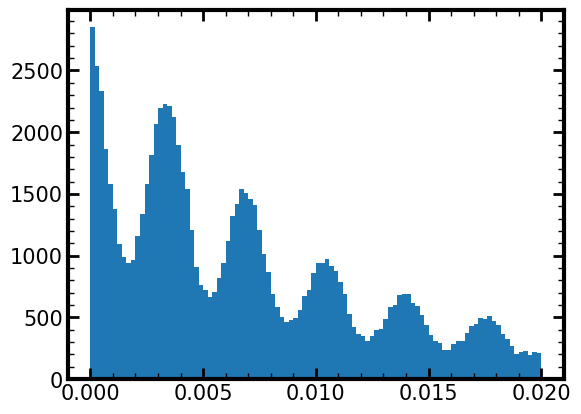

In [29]:
dataCal, sigma = data_calibrated_NSAMP(active_area = true_active_area, extension = extension, offset = offset, gain = Gain, ratio_keV = ratio_keV, unidades = 2, sigma_ADUs = sig_ADUs)
print('Sigma: ', sigma, ' keV')

plt.hist(dataCal.flatten(), bins = 100, range = (0, 0.02))
plt.show()

## Creacción del DataFrame de los clusters detectados

In [32]:
# min_energy_for_label = 100 * sigma
# dataCal = true_active_area
min_energy_for_label = 3*sigma
label_img, nlabels_img = sk.measure.label(dataCal > min_energy_for_label, connectivity=2, return_num=True)
prop = sk.measure.regionprops(label_img, dataCal)

TotalDataFrame = event_DataFrame(dataCal=dataCal, label_img=label_img, nlabels_img =nlabels_img, 
                                    prop=prop, header=header, extension=extension, unidades = 2)

# TotalDataFrame[2200:2250]

# TotalDataFrame[0:50]
# TotalDataFrame[50:100]
TotalDataFrame[100:150]
# TotalDataFrame[50:100]

Events: 1533


,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
101,122,2,1x1,1,0.004036,0.004,"[0.0, 0.0]"
102,122,2,1x1,1,0.004362,0.004,"[0.0, 0.0]"
103,122,2,1x1,1,0.005948,0.006,"[0.0, 0.0]"
104,122,2,1x1,1,0.004898,0.005,"[0.0, 0.0]"
105,122,2,2x1,2,0.016059,0.008,"[0.5, 0.0]"
106,122,2,1x1,1,0.010180,0.010,"[0.0, 0.0]"
107,122,2,1x1,1,0.003663,0.004,"[0.0, 0.0]"
108,122,2,1x1,1,0.007362,0.007,"[0.0, 0.0]"
109,122,2,2x2,3,0.019558,0.007,"[0.3333, 0.3333]"


## Visualizar un cluster y su información

1
Event Slice:
x: [430,431]
y: [1,2]


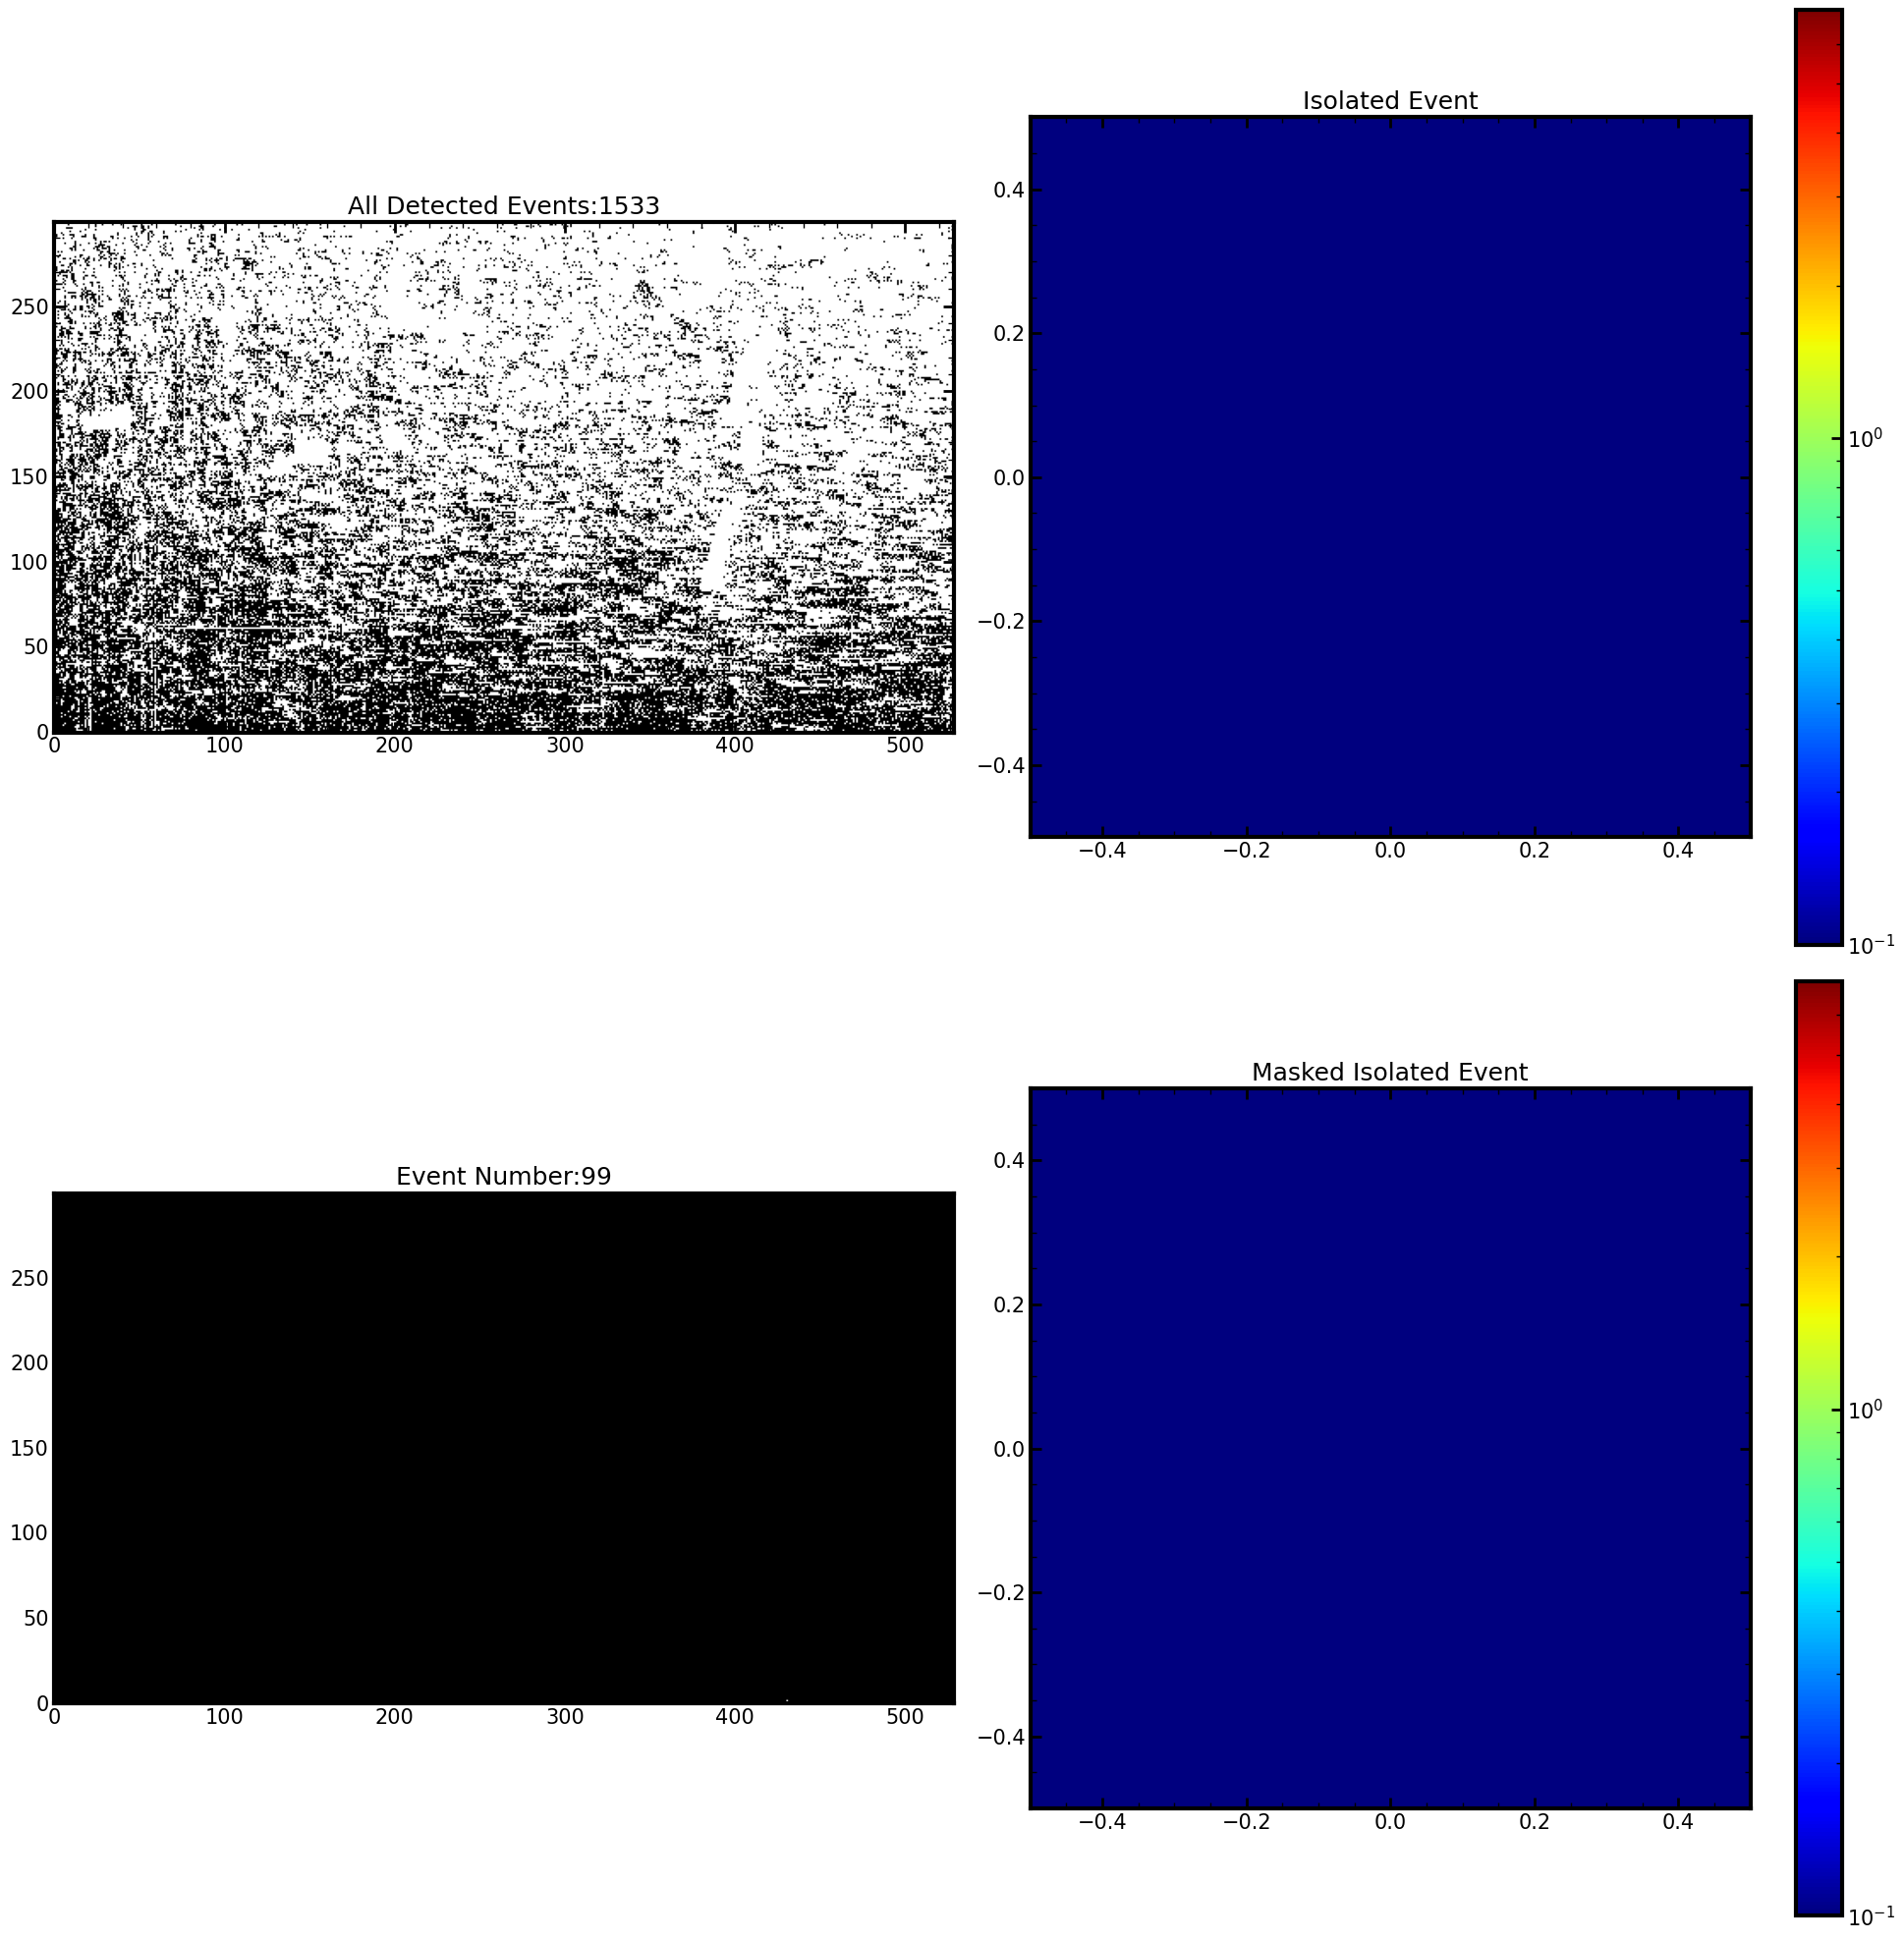

,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
99,122,2,1x1,1,0.004352,0.004,"[0.0, 0.0]"


In [33]:
n_label = 99
extra = 0


label, n_events = ndimage.label(dataCal > min_energy_for_label,structure=[[1,1,1],[1,1,1],[1,1,1]]) # 48
# label, n_events = ndimage.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]]) ## 50, 52
loc = ndimage.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[20,20])
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[1,0].set_title('Event Number:'+str(n_label))
axs[1,0].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[0,1].set_title('Isolated Event')
x1 = axs[0,1].imshow(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap= Colormap, norm = Norm)#, origin = 'lower')
# plt.colorbar()

mask_35 = np.invert(label==n_label)


data_mask = ma.masked_array(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
print(len(data_mask[0]))

axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap= Colormap, norm = Norm)#, origin='lower')
# axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label:', n_label)
# plt.legend('Baricentrum')

fig.colorbar(x1, ax=axs[0,1])
fig.colorbar(x2, ax=axs[1,1])
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.tight_layout()
plt.show()


TotalDataFrame.iloc[[n_label-1]]

### Con faldas

6
Event Slice:
x: [44,46]
y: [96,97]


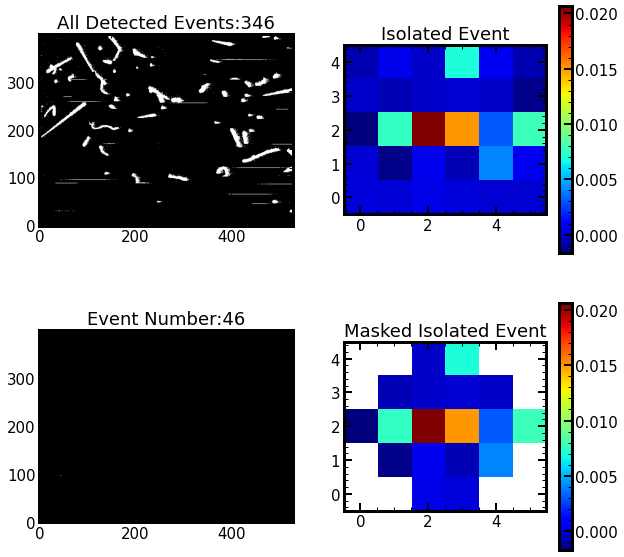

,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
46,100,1,2x1,2,0.0357,0.018,"[0.5, 0.0]"


In [19]:
n_label = 46
n_skirts = 2
extra = 2


label, n_events = ndimage.label(dataCal > min_energy_for_label,structure=[[1,1,1],[1,1,1],[1,1,1]]) # 48
# label, n_events = ndimage.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]]) ## 50, 52
loc = ndimage.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[10,10])
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[1,0].set_title('Event Number:'+str(n_label))
axs[1,0].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[0,1].set_title('Isolated Event')
x1 = axs[0,1].imshow(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap= Colormap)#, origin = 'lower')
# plt.colorbar()

### Skirts ###
mask_35 = np.invert(nd.binary_dilation(label==n_label, iterations= n_skirts))
# mask_35 = np.invert(label==n_label)
# skirt = nd.binary_dilation(mask_35, structure=[[0,0,0],[0,1,0],[0,0,0]], iterations = 2)
# print(skirt)


data_mask = ma.masked_array(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
print(len(data_mask[0]))

axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap= Colormap)#, origin='lower')
# axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label:', n_label)
# plt.legend('Baricentrum')

fig.colorbar(x1, ax=axs[0,1])
fig.colorbar(x2, ax=axs[1,1])
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.show()


TotalDataFrame.iloc[[n_label-1]]

## Visualizador

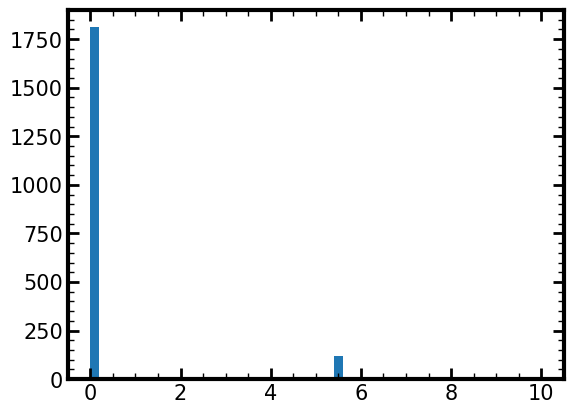

In [36]:
list_charge = TotalDataFrame['Total Charge (KeV)']

plt.hist(list_charge, bins=50, range = (0, 10))
plt.show()